In [1]:
import graphlab

In [3]:
sales = graphlab.SFrame('week2_home_data.gl')

In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

In [8]:
train_data, test_data = sales.random_split(.8, seed=0)

In [10]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16468

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.023622     | 4336473.363966     | 1607478.138197       | 264165.032120 | 240000.135912   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [11]:
print test_data['price'].mean()

543054.042563


In [12]:
print sqft_model.evaluate(test_data)

{'max_error': 4133164.5007960577, 'rmse': 255210.84794251865}


In [15]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

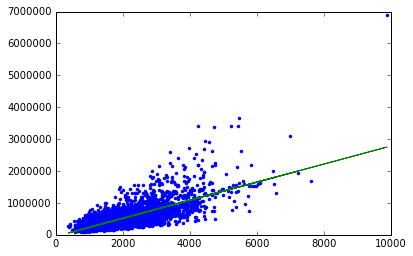

In [18]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [19]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-48916.9745247,5086.95984658
sqft_living,None,283.190341125,2.2378506226


In [20]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [21]:
sales[features]

bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
3,1,1180,5650,1,98178
3,2.25,2570,7242,2,98125
2,1,770,10000,1,98028
4,3,1960,5000,1,98136
3,2,1680,8080,1,98074
4,4.5,5420,101930,1,98053
3,2.25,1715,6819,2,98003
3,1.5,1060,9711,1,98198
3,1,1780,7470,1,98146
3,2.5,1890,6560,2,98038


In [22]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

In [23]:
zip_dependent_model = graphlab.linear_regression.create(train_data, target='price', features=features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16575

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.059787     | 3748261.909776     | 1058595.228279       | 182845.836617 | 162575.312823   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [24]:
print features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [25]:
print sqft_model.evaluate(test_data)
print zip_dependent_model.evaluate(test_data)

{'max_error': 4133164.5007960577, 'rmse': 255210.84794251865}
{'max_error': 3475123.8391017406, 'rmse': 179722.2777861323}


In [26]:
house1 = sales[sales['id']=='5309101200']

In [27]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [34]:
print house1['price']

[620000, ... ]


In [35]:
print sqft_model.predict(house1)

[630739.8441758605]


In [36]:
print zip_dependent_model.predict(house1)

[722322.7576506415]


In [39]:
house2 = sales[sales['id']=='1925069082']

In [40]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [41]:
print sqft_model.predict(house2)

[1265086.2082964084]


In [42]:
print zip_dependent_model.predict(house2)

[1438396.6890610503]


In [43]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [46]:
# Filter for houses in the most expensive neighborhood
fancy_houses = sales[sales['zipcode'] == '98039']

In [48]:
fancy_houses

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000,4,3.5,4860,23885,2,0
2540700110,2015-02-12 00:00:00+00:00,1905000,4,3.5,4210,18564,2,0
3262300940,2014-11-07 00:00:00+00:00,875000,3,1,1220,8119,1,0
3262300940,2015-02-10 00:00:00+00:00,940000,3,1,1220,8119,1,0
6447300265,2014-10-14 00:00:00+00:00,4000000,4,5.5,7080,16573,2,0
2470100110,2014-08-04 00:00:00+00:00,5570000,5,5.75,9200,35069,2,0
2210500019,2015-03-24 00:00:00+00:00,937500,3,1,1320,8500,1,0
6447300345,2015-04-06 00:00:00+00:00,1160000,4,3,2680,15438,2,0
6447300225,2014-11-06 00:00:00+00:00,1880000,3,2.75,2620,17919,1,0
2525049148,2014-10-07 00:00:00+00:00,3418800,5,5,5450,20412,2,0


In [50]:
# Calculate average cost of house in the zipcode
print fancy_houses['price'].mean()

2160606.6


In [54]:
# Select for houses 2000 ft^2 or larger
pretty_big_houses = sales[(sales['sqft_living'] > 1999)]

In [55]:
pretty_big_houses

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0


In [56]:
# Select for houses 4000 ft^2 or larger (don't know how to do it in one line yet)
pretty_big_houses = pretty_big_houses[(pretty_big_houses['sqft_living'] < 4001)]

In [57]:
pretty_big_houses

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
0461000390,2014-06-24 00:00:00+00:00,687500,4,1.75,2330,5000,1.5,0


In [60]:
# Check filtering
pretty_big_houses['sqft_living'].max()

4000

In [61]:
pretty_big_houses['sqft_living'].min()

2000

In [64]:
# Calculate number of houses in that range
pretty_big_houses.num_rows()

9221

In [65]:
# Calculate total number of houses
sales.num_rows()

21613

In [68]:
# Calculate percentage of "medium" sized houses
percent_pretty_big = 9221.0/21613*100

In [69]:
print percent_pretty_big

42.6641373248


In [72]:
# Select a lot of features to compare RMSE between two models
tons_of_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors
                   ]

In [73]:
# Choose data
train_data, test_data = sales.random_split(.8, seed=0)

In [76]:
# Generate less complete model with 6 features
zip_dependent_model = graphlab.linear_regression.create(train_data, target='price', features=features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16490

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.048604     | 3733479.254551     | 953963.766536        | 183582.623555 | 148506.232404   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [77]:
# Generate more advanced model with lots of features
super_model = graphlab.linear_regression.create(train_data, target='price', features=tons_of_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16508

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.097124     | 3443567.785925     | 1061048.231451       | 155445.968185 | 138269.551662   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [78]:
# Compute RMSE for each
print zip_dependent_model.evaluate(test_data)

{'max_error': 3466978.967421862, 'rmse': 179590.58632153377}


In [79]:
print super_model.evaluate(test_data)

{'max_error': 3543693.6263070432, 'rmse': 156945.56144346512}
